In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets
import seaborn as sns
from IPython.display import display
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

In [19]:
file = pd.read_excel("/home/ashish/Downloads/data set 001-2.xlsx")
print(file.loc[1][0])
print( file.loc[2][0])
file = file.loc[6:]
file.rename(columns = file.loc[6], inplace = True)
file = file[1:]
file = file.drop(columns = np.nan)
# file = file.replace(np.nan, -9999)
file = file.replace('YES', 1)
file = file.replace('NO',0)
file.reset_index(inplace = True)
file = file.drop(columns = ['index'])
file.head(2)

Extract of retailer data- Delhi NCR
Total retailers in database 78,000


/tmp/ipykernel_34341/1161081199.py:11: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



,Ward Name,Shop Name,Shop No.,Floor No.,Building Name,Street Name,Landmark,Sub Locality,Locality,City Name,...,Others,Retail,Wholesale_trade,Semi Wholesale ( Both Retail & wholesale ),Retail Trade,Wholesale Trade,Business area of the shop,Total FMCG sales per day,TOTAL OUTLET SALES PER DAY IN RUPEES (DEALER STATED),Store Front Photo
0,Shastri Nagar,W H SMITH,0,0,Inderlok metro station,Main road,INSIDE( Inderlok metro station ),Inderlok metro station,Inderlok metro station,DELHI UA,...,Chest collar,1.0,NaN,NaN,NaN,NaN,101-150 SQ.FT,Rs 2001 - 3500,Rs 3501 - 5000,1832596_CLICK_1578546755.jpg
1,Lajpat Nagar,SHRI BALAJI STORE,C 144,0,NaN,NaN,NEAR( Railway office ),Lajpat Nagar,LajpatNagar,DELHI UA,...,NaN,1.0,NaN,NaN,NaN,NaN,50-100 SQ.FT,Rs 5001 - 10000,Rs 5001 - 10000,1832742_CLICK_1578473082.jpg


-----

-----

Category Stocking

In [20]:
c_stock_file = file.iloc[:,34:46]
c_stock_file.insert(0,'Shop Name', file['Shop Name'])
c_stock_file.head(2)

,Shop Name,Branded Packaged Tea,Branded Packaged Coffee,Branded Packaged Juices & Nectars,Branded Packaged Health drinks,Branded Packaged Salt,Branded Packaged Atta,Branded Packaged Pulses,Branded Packaged Spices/Masala,Branded Packged Rice,Branded Packaged water,Branded Packaged Fruit & Vegetables based beverages,None of the above
0,W H SMITH,0,0,1,0,0,0,0,0,0,1,1,0
1,SHRI BALAJI STORE,1,0,0,0,1,0,0,0,0,0,0,0


In [21]:
c_stock = [col for col in c_stock_file.columns if 'Branded' in col]
c_stock_ = c_stock_file[c_stock].sum()
fig_tea = px.bar(c_stock_, x=c_stock_.index, y=c_stock_.values, title='Category Stock Analysis')
fig_tea.update_layout(xaxis_title='Category Stock', yaxis_title='Number of Shops')
fig_tea.show()

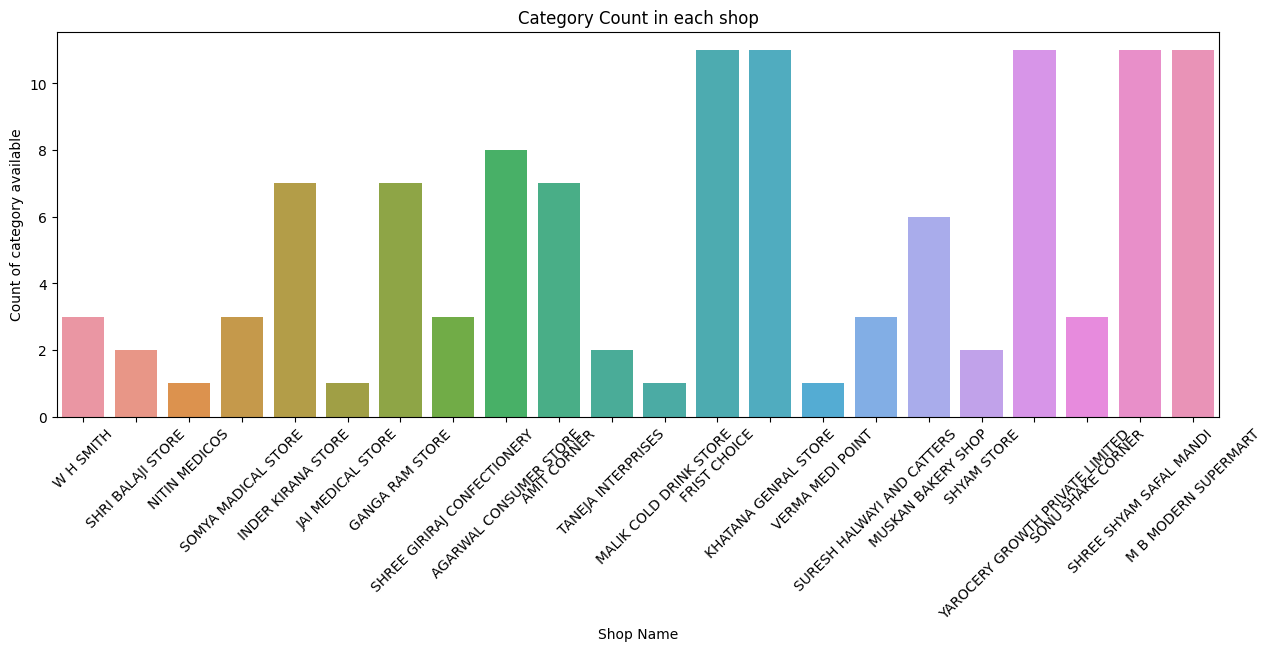

In [22]:
category_count = file[['Shop Name', 'Count of category available']]
plt.figure(figsize = (15,5))
sns.barplot(category_count, x = category_count['Shop Name'], y = category_count['Count of category available'])
plt.xticks(rotation = 45)
plt.title('Category Count in each shop')
plt.show()

In [23]:
c_ = c_stock_file.T
c_.rename(columns = c_.iloc[0],inplace=True)
c_ = c_[1:]
c_ = c_.reset_index()
stock_column_ = [col for col in c_.columns if col != 'index']
stock_dropdown_ = widgets.Dropdown(
    options=stock_column_,
    value=stock_column_[0],
    description='Select Stock:',
    style={'width': '50%'}
)

# Output widget to display results
output_ = widgets.Output()

def show_available_shops(stock_column_):
    selected_shops_ = c_[c_[stock_column_] == True]['index']
    available_shops_text_ = "\n".join(selected_shops_)
    
    with output_:
        output_.clear_output()
        print(f"Shops with {stock_column_} available:\n{available_shops_text_}")

# Bind dropdown change event to the function
widgets.interactive_output(show_available_shops, {'stock_column_': stock_dropdown_})

# Display widgets
display(stock_dropdown_)
display(output_)

Dropdown(description='Select Stock:', options=('W H SMITH', 'SHRI BALAJI STORE', 'NITIN MEDICOS', 'SOMYA MADIC…

Output()

-----

-----

Tea Analysis

In [24]:
tea_analysis = file.iloc[:,47:70]
tea_analysis.head(2)

,Tata Gold,Red Label,Red Label Natural care,Tata Premium,Taj Mahal,Tata Agni,Society,3 Roses,3 Roses Natural Care,Chakra Gold,...,Today Star,Gemini,Tetley Green Tea,Lipton Green Tea,Tata Agni Leaf (Carton Pack),Tata Elaichi,Goodrick Leaf,Evergreen,Kanan Devan,None of the above
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0


In [25]:
list_col = [col for col in tea_analysis.columns]
tea_ = tea_analysis[list_col].sum()
fig_tea = px.bar(tea_, x=tea_.index, y=tea_.values, title='Tea Stock Analysis')
fig_tea.update_layout(xaxis_title='Tea Stock', yaxis_title='Number of Shops')
fig_tea.show()

In [26]:
tea_revenue_count = file[['Shop Name', 'monthly sales of Packaged Tea','Price_1','Price_2']]

tea_revenue_count['monthly sales of Packaged Tea'] = tea_revenue_count['monthly sales of Packaged Tea'].str.replace('Rs.','')

tea_revenue_count = tea_revenue_count.replace('Rs.6-10','35GM')
tea_revenue_count['Price_1'] = tea_revenue_count['Price_1'].str.replace('GM','')
tea_revenue_count['Price_2'] = tea_revenue_count['Price_2'].str.replace('GM','')
tea_revenue_count=tea_revenue_count.replace(np.nan,-1)
def median(x):
    if type(x)==str:
        values = x.split('-')
        return ((float(values[0])+float(values[1]))/2)
    try:
        return float(x)
    except:
        return None
def median_(x):
    if type(x)==str:
        values = x.split('-')
        return (float(values[0]))
    try:
        return float(x)
    except:
        return None
tea_revenue_count['monthly sales of Packaged Tea']= tea_revenue_count['monthly sales of Packaged Tea'].apply(median)
tea_revenue_count['monthly sales of Packaged Tea']=tea_revenue_count['monthly sales of Packaged Tea'].astype(float)
tea_revenue_count['Price_1'] = tea_revenue_count['Price_1'].apply(median_)
tea_revenue_count['Price_2'] = tea_revenue_count['Price_2'].apply(median_)
tea_revenue_count['Price_1'] = tea_revenue_count['Price_1'].astype(float)
tea_revenue_count['Price_2'] = tea_revenue_count['Price_2'].astype(float)
tea_revenue_count

/tmp/ipykernel_34341/1906220661.py:3: FutureWarning:

The default value of regex will change from True to False in a future version.

/tmp/ipykernel_34341/1906220661.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Shop Name,monthly sales of Packaged Tea,Price_1,Price_2
0,W H SMITH,-1.0,-1.0,-1.0
1,SHRI BALAJI STORE,2750.5,100.0,250.0
2,NITIN MEDICOS,-1.0,-1.0,-1.0
3,SOMYA MADICAL STORE,-1.0,-1.0,-1.0
4,INDER KIRANA STORE,2750.5,35.0,250.0
5,JAI MEDICAL STORE,-1.0,-1.0,-1.0
6,GANGA RAM STORE,375.5,35.0,250.0
7,SHREE GIRIRAJ CONFECTIONERY,-1.0,-1.0,-1.0
8,AGARWAL CONSUMER STORE,17500.5,250.0,950.0
9,AMIT CORNER,1500.5,50.0,100.0


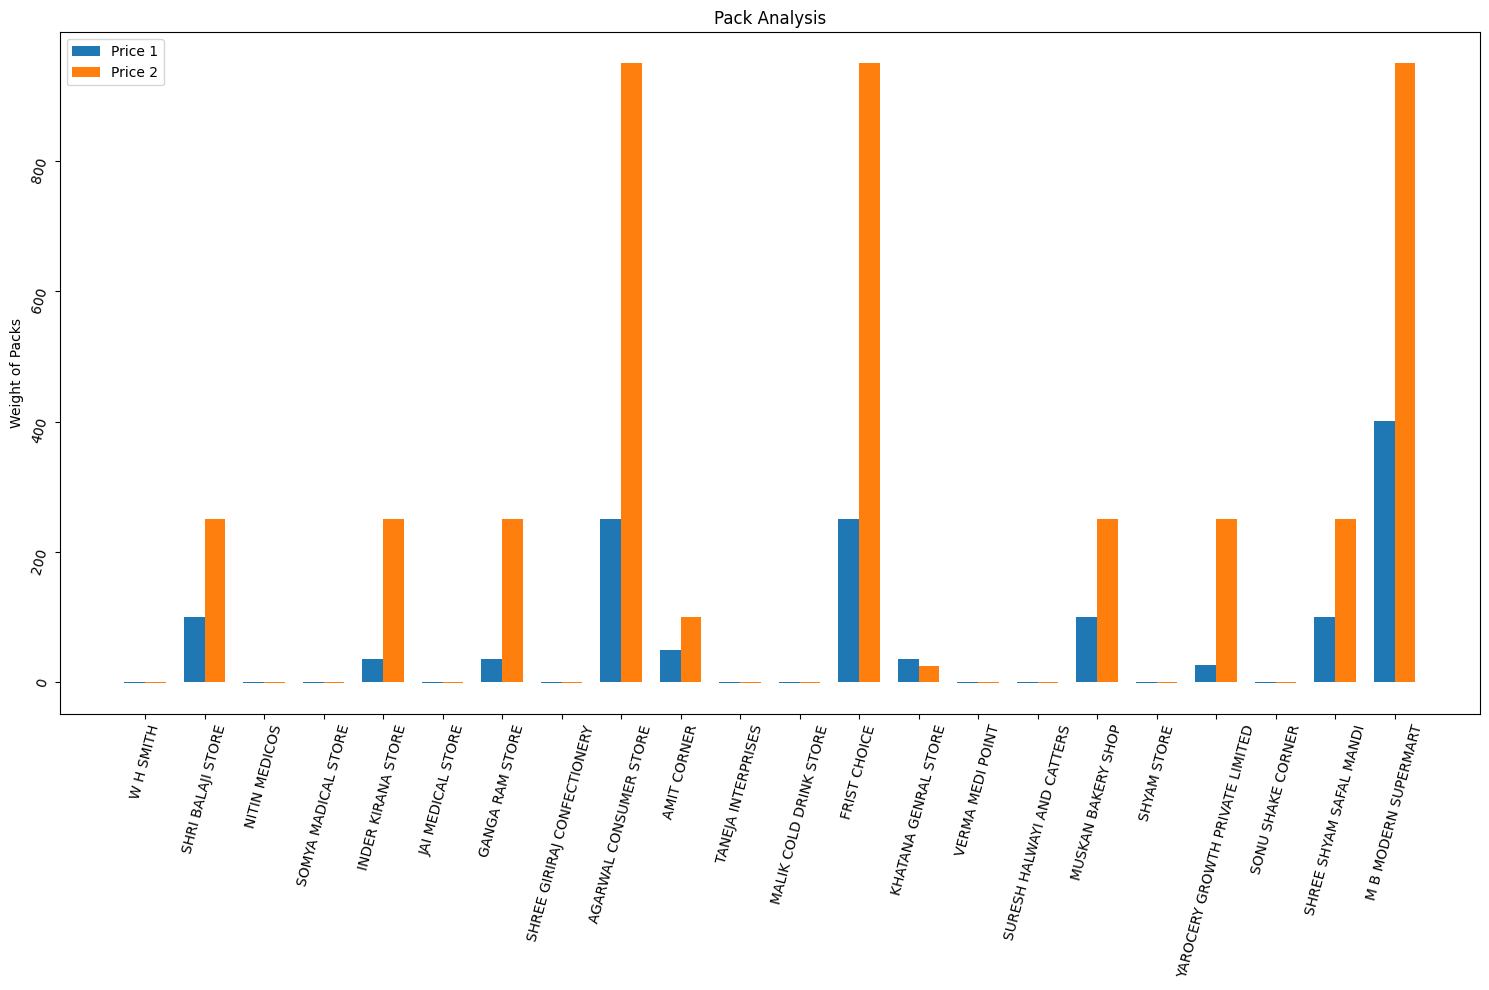

In [27]:
fig, ax = plt.subplots(figsize = (15,10))
x = np.arange(len(tea_revenue_count['Shop Name']))
width = 0.35
rects1 = ax.bar(x - width/2, tea_revenue_count['Price_1'], width, label='Price 1')
rects2 = ax.bar(x + width/2, tea_revenue_count['Price_2'], width, label='Price 2')
ax.set_ylabel('Weight of Packs')
ax.set_title('Pack Analysis')
ax.set_xticks(x)
ax.set_xticklabels(tea_revenue_count['Shop Name'])
ax.tick_params(labelrotation=75)
ax.legend()
fig.tight_layout()
plt.show()

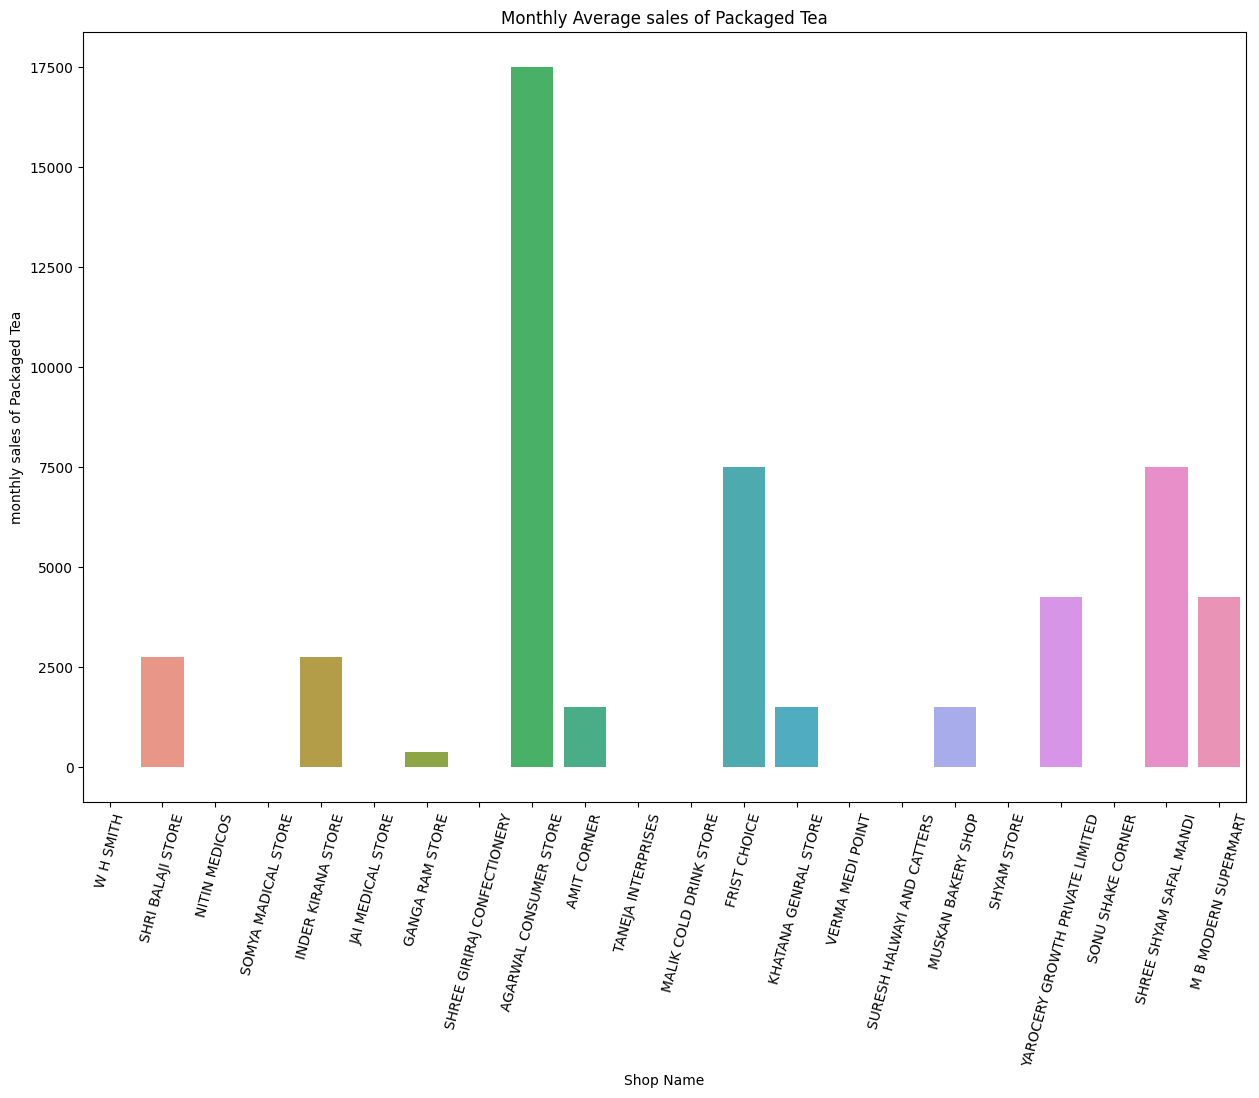

In [28]:

plt.figure(figsize = (15,10))
sns.barplot(tea_revenue_count, x = tea_revenue_count['Shop Name'], y = tea_revenue_count['monthly sales of Packaged Tea'])
plt.title('Monthly Average sales of Packaged Tea')
plt.xticks(rotation = 75)
plt.show()

In [29]:
file[file['Wholesale_trade'] ==1]['Shop Name']


10    TANEJA INTERPRISES
Name: Shop Name, dtype: object

Analysing that Taneja Enterprise is a wholesale shop and still they dont have any revenue in Tea means that they deal with some other kind of FMCG product. Since in the datafile, we have many kind of FMCG product, we need to check the type of product they deal in. 

In [30]:
tea_revenue_count[tea_revenue_count['Price_2']==950.0]

,Shop Name,monthly sales of Packaged Tea,Price_1,Price_2
8,AGARWAL CONSUMER STORE,17500.5,250.0,950.0
12,FRIST CHOICE,7500.5,250.0,950.0
21,M B MODERN SUPERMART,4250.5,401.0,950.0


Since, all these shops have sale same products, the reason that Agarwal Consumer store can be because of the locality or the area the store is in. 

In [31]:
tea_analysis.insert(0,'Shop Name', file['Shop Name'])
tea_columns = [col for col in tea_analysis.columns if col != 'Shop Name']
tea_dropdown = widgets.Dropdown(
    options=tea_columns,
    value=tea_columns[0],
    description='Select Tea:',
    style={'width': '50%'}
)

# Output widget to display results
output = widgets.Output()

def show_available_shops(tea_columns):
    selected_shops = tea_analysis[tea_analysis[tea_columns] == True]['Shop Name'] # replace True with False for the list of shops where tea is not available
    available_shops_text = "\n".join(selected_shops)
    
    with output:
        output.clear_output()
        print(f"Shops with {tea_columns} available:\n{available_shops_text}")

# Bind dropdown change event to the function
widgets.interactive_output(show_available_shops, {'tea_columns': tea_dropdown})

# Display widgets
display(tea_dropdown)
display(output)

Dropdown(description='Select Tea:', options=('Tata Gold', 'Red Label', 'Red Label Natural care', 'Tata Premium…

Output()

-----

-----

Sales Per day

In [32]:
trade_profile = file[['Retail','Wholesale_trade','Semi Wholesale ( Both Retail & wholesale )']]
trade_profile = trade_profile.replace(np.nan,0)
print('total store', len(trade_profile['Retail']))
print('number of retail store',trade_profile['Retail'].sum())
print('number of wholesale store',trade_profile['Wholesale_trade'].sum())
print('number of Semi Wholesale store',trade_profile['Semi Wholesale ( Both Retail & wholesale )'].sum())

total store 22
number of retail store 21.0
number of wholesale store 1.0
number of Semi Wholesale store 0.0


In [33]:
sales = file[['Shop Name','Total FMCG sales per day ','TOTAL OUTLET SALES PER DAY IN RUPEES (DEALER STATED)']]
sales.head(2)

,Shop Name,Total FMCG sales per day,TOTAL OUTLET SALES PER DAY IN RUPEES (DEALER STATED)
0,W H SMITH,Rs 2001 - 3500,Rs 3501 - 5000
1,SHRI BALAJI STORE,Rs 5001 - 10000,Rs 5001 - 10000


/tmp/ipykernel_34341/361592030.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.

/tmp/ipykernel_34341/361592030.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_34341/361592030.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.

/tmp/ipykernel_34341/361592030.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_34341/361592030.py:11: SettingWithCopyWarning:


A value is tryin

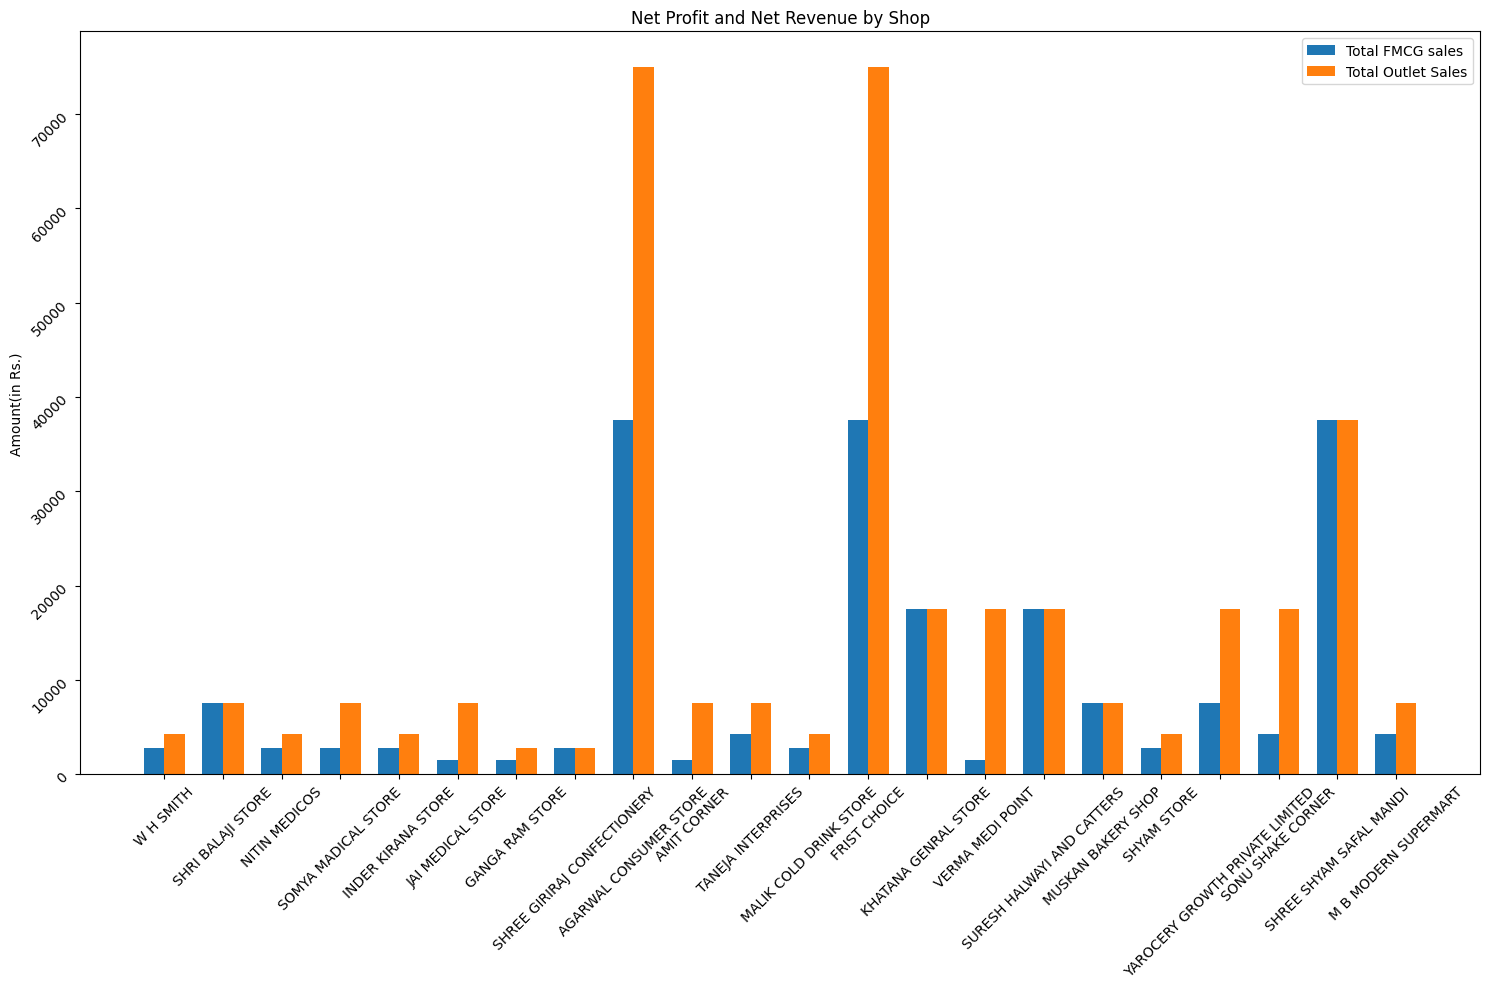

In [34]:
sales['Total FMCG sales per day '] = sales['Total FMCG sales per day '].str.replace('Rs.','')
sales['TOTAL OUTLET SALES PER DAY IN RUPEES (DEALER STATED)'] = sales['TOTAL OUTLET SALES PER DAY IN RUPEES (DEALER STATED)'].str.replace('Rs.','')
def median(x):
    if type(x)==str:
        values = x.split('-')
        return ((float(values[0])+float(values[1]))/2)
    try:
        return float(x)
    except:
        return None
sales['Total FMCG sales per day ']= sales['Total FMCG sales per day '].apply(median)
sales['Total FMCG sales per day ']=sales['Total FMCG sales per day '].astype(float)
sales['TOTAL OUTLET SALES PER DAY IN RUPEES (DEALER STATED)']= sales['TOTAL OUTLET SALES PER DAY IN RUPEES (DEALER STATED)'].apply(median)
sales['TOTAL OUTLET SALES PER DAY IN RUPEES (DEALER STATED)']=sales['TOTAL OUTLET SALES PER DAY IN RUPEES (DEALER STATED)'].astype(float)
# plt.figure(figsize = (15,15))
fig, ax = plt.subplots(figsize = (15,10))
x = np.arange(len(sales['Shop Name']))
width = 0.35
rects1 = ax.bar(x - width/2, sales['Total FMCG sales per day '], width, label='Total FMCG sales')
rects2 = ax.bar(x + width/2, sales['TOTAL OUTLET SALES PER DAY IN RUPEES (DEALER STATED)'], width, label='Total Outlet Sales')
ax.set_ylabel('Amount(in Rs.)')
ax.set_title('Net Profit and Net Revenue by Shop')
ax.set_xticks(x)
ax.set_xticklabels(sales['Shop Name'])
ax.tick_params(labelrotation=45)
ax.legend()
fig.tight_layout()
plt.show()

-----